In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [21]:
notebook_dir = os.getcwd()
data_path = os.path.join(notebook_dir, "..", "data", "MachineLearningRating_v3.txt")

df = pd.read_csv(data_path, delimiter="|")

C:\Users\Bisrat\AppData\Local\Temp\ipykernel_10448\130270177.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, delimiter="|")


In [9]:
df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]].describe()

,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,2.255311e+05
std,2.302845e+02,2.384075e+03,5.645157e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,1.350000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.800000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07


In [10]:
df.dtypes
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

In [11]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
print(missing_percent[missing_percent > 0])

NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
Rebuilt                     64.183810
Converted                   64.183810
WrittenOff                  64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
VehicleType                  0.055195
make                         0.055195
mmcode                       0.055195
Model                        0.055195
Cylinders                    0.055195
bodytype                     0.055195
kilowatts                    0.055195
NumberOfDoors                0.055195
VehicleIntroDate             0.055195
cubiccapacity                0.055195
CapitalOutstanding           0.000200
dtype: float64


<Axes: xlabel='TotalClaims', ylabel='Count'>

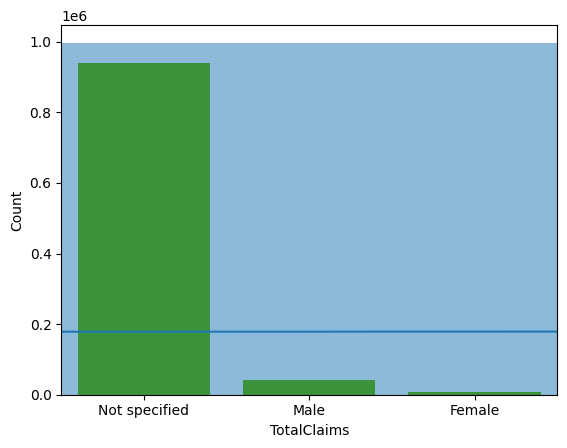

In [13]:
sns.histplot(df["TotalClaims"], kde=True)
sns.histplot(df["CustomValueEstimate"], kde=True)
sns.countplot(data=df, x="Gender")


c:\Users\Bisrat\Desktop\KAIM\insurance_risk_analytics\venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


<Axes: xlabel='Province'>

c:\Users\Bisrat\Desktop\KAIM\insurance_risk_analytics\venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


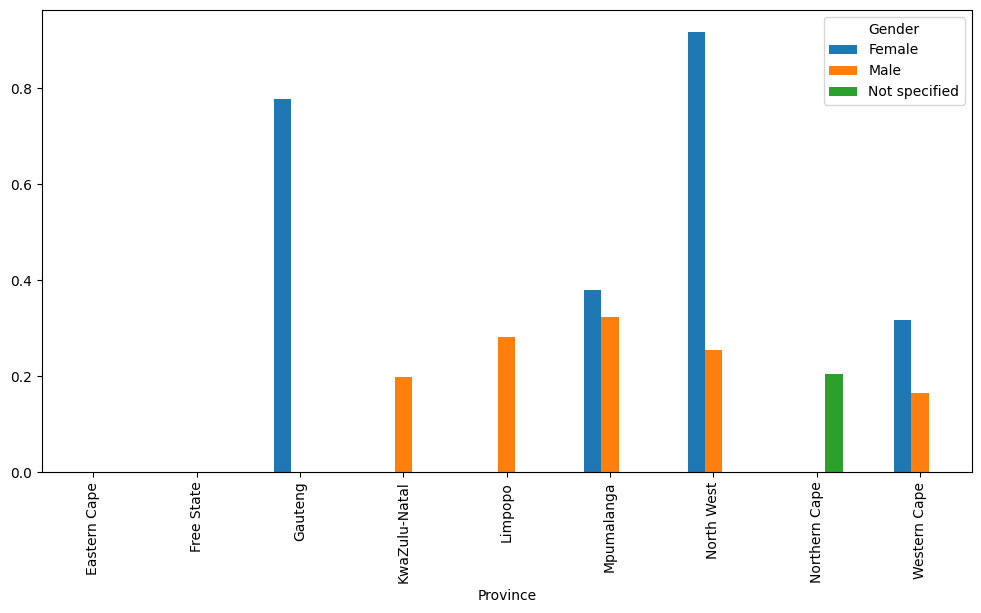

In [14]:
# Loss Ratio by Province and Gender
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]

province_gender = df.groupby(["Province", "Gender"])["LossRatio"].mean().unstack()
province_gender.plot(kind="bar", figsize=(12, 6))

<Axes: >

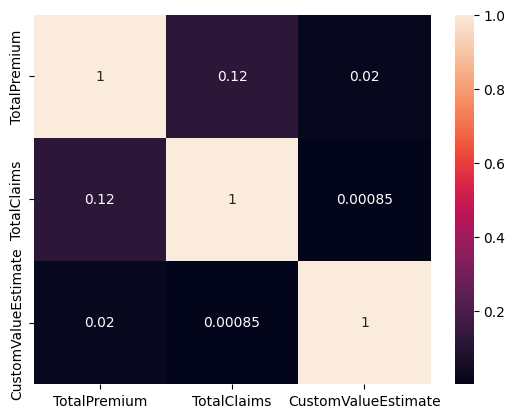

In [15]:
# Correlation matrix
sns.heatmap(df[["TotalPremium", "TotalClaims", "CustomValueEstimate"]].corr(), annot=True)

<Axes: title={'center': 'Monthly Claims & Premium Trend'}, xlabel='TransactionMonth'>

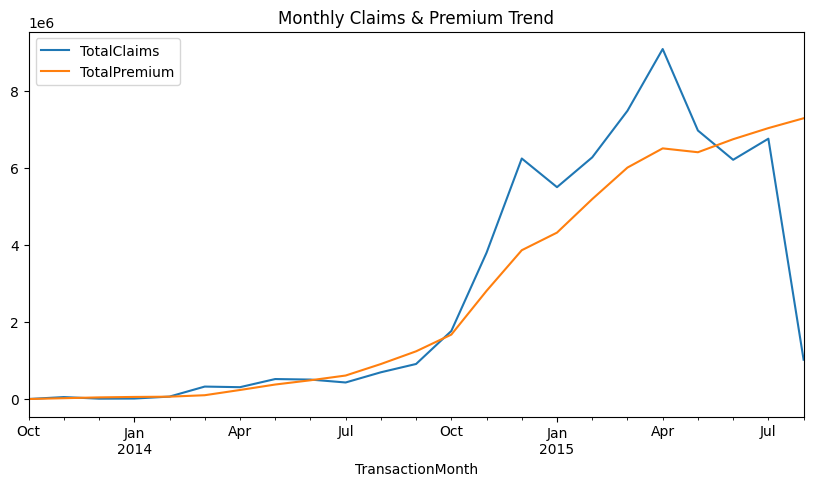

In [17]:
if not pd.api.types.is_datetime64_any_dtype(df["TransactionMonth"]):
	df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"])

monthly = df.groupby(df["TransactionMonth"].dt.to_period("M"))[["TotalClaims", "TotalPremium"]].sum()
monthly.plot(figsize=(10, 5), title="Monthly Claims & Premium Trend")

<Axes: xlabel='TotalClaims'>

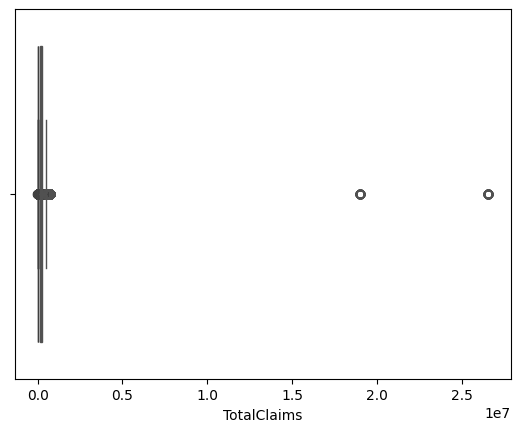

In [18]:
sns.boxplot(data=df, x="TotalClaims")
sns.boxplot(data=df, x="CustomValueEstimate")

<Axes: title={'center': 'Top 10 Makes by Avg Claim'}, ylabel='make'>

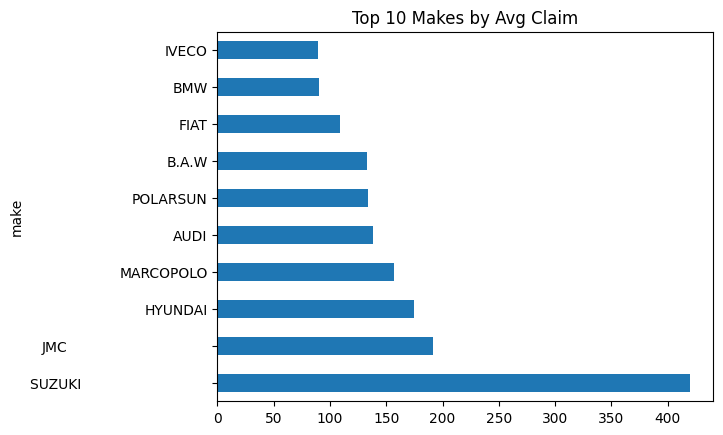

In [20]:
claim_by_make = df.groupby("make")["TotalClaims"].mean().sort_values(ascending=False)
claim_by_make.head(10).plot(kind="barh", title="Top 10 Makes by Avg Claim")